<a href="https://colab.research.google.com/github/jarvismayur/Deep-Learning-With-PyTorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.

Resources:

* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [ ]:
what_were_covering = {1: "data ( prepaare and load )",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predicitions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all togather"}

In [ ]:
what_were_covering

{1: 'data ( prepaare and load )',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predicitions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all togather'}

In [ ]:
import torch
from torch import nn # nn contains all the PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'2.3.0+cu121'

## 1. Data ( Preparing and loading )

Data can be almost anyting.. in machine learning.

* Excel spreadsheet
* Images of any kind
* Video (  Youtune has lots of the data.. )
* Audio like songs or podcasts
* DNA
* Text

Machine learning is game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To Showcase this, let's create some known data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**


In [ ]:
# create known paramerters
weight = 0.7
bias = 0.3

# create
start  = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

## Spliting data
Splitting data into training and test sets ( one of the most important concepts in machine learning in general )

Let's create a training and test set with  our data.



In [ ]:
# create a train/test split.
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in !

"Visualize, visualize, visualize!"

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predicitons if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predicitions")

  # Show the legend
  plt.legend(prop={"size":14});

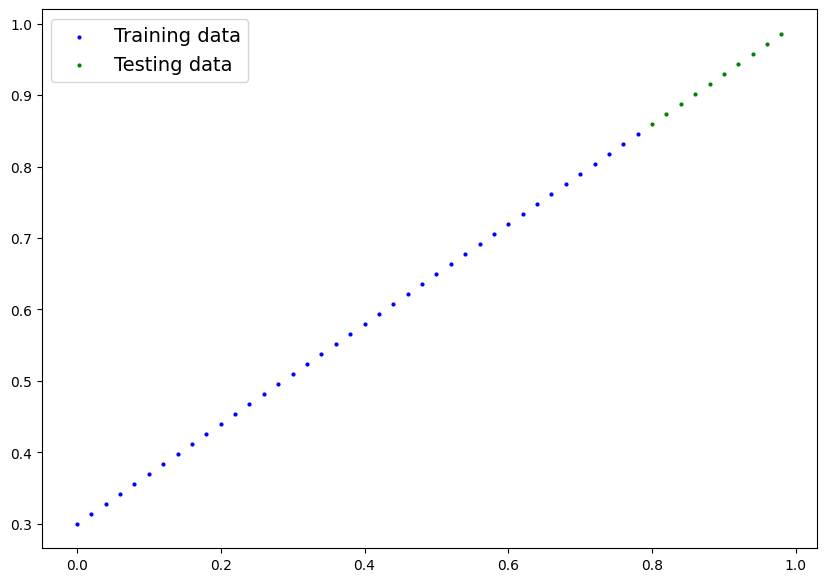

In [ ]:
plot_predictions();

## 2. Build Model

Our first PyTorch Model!

This is very exciting... let's do it!

Because we're going to be building classes throughout  the course, I'd recommend getting familiar with OOP in Python, to do so you can use the following resources from Real Python: https://realpython.com/python3-object-oriented-programming/

What our model does:

* Start with random values ( weight & bais )
* Look at training data and adjust the random values to better represent ( or get closer to ) the ideal values ( the weight & bais values we used to create te data ).

How does it do so ?

Through two main algorithms:
1. Gradient descent - https://youtu.be/IHZwWFHWa-w
2. Backpropagation -  https://youtu.be/Ilg3gGewQ5U




In [ ]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherhits form nn
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- can this parameter be updated via gradient descent ?
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, # <- start with a randon bias and try to adjust it to the ideal bias
                                         requires_grad=True, # <- can this parameter be updated via gradient descent?
                                         dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

  # Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regession formula

## PyTorch model building essentials
* torch.nn  - contains all of the buildings for computational graphs ( a neural network can be considered a computational graph )
* torch.nn.Parameter - what parameters should out model try to learn. often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient desecent.
* def forward() - All nn.Module subclasses require you to overwrite  forward(), this method defines what happens in the forward computation.

See more of these essential modules via the PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html


## Checking the contents of our PyTorch model
Now we've created a model, let's see what's inside.

So we can check our model parameters or what's inside our model using .parameters()

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module )
model_0 = LinearRegressionModel()

# check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making Prediction using torch.inference_mode()

To check our model's predictive power. let's see how well it predicts y_test based on X_test

When we pass data through our model, it's going to run it through the forward() method.

In [ ]:
y_preds = model_0(X_test)

In [ ]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# You can also do something similar with torch.no_grad(), however, torch.inference_mode() is preferred
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

See more on inference mode here -  https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=cnKavO9iTgwQ-rfri6u7PQ


In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

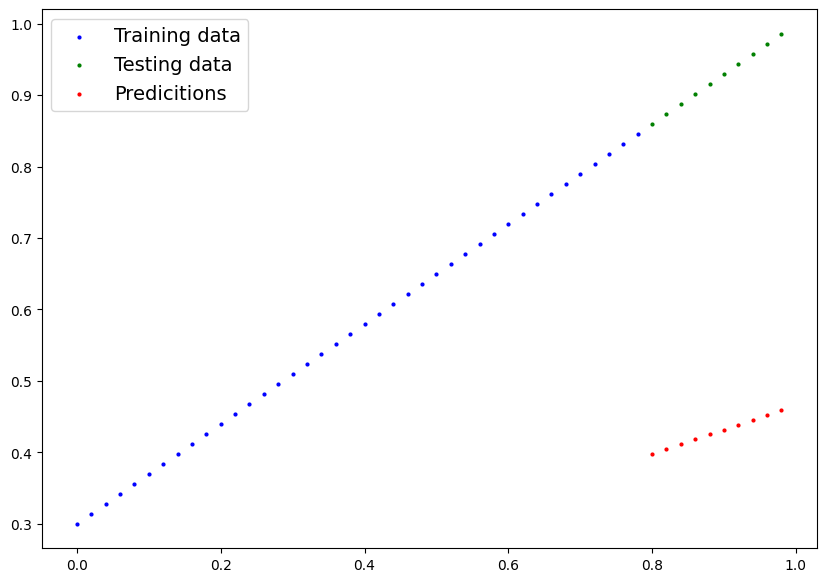

In [ ]:
plot_predictions(predictions=y_preds)

## Train Model

The whole idea of training is for a model to move from sone unknown parameters (these may be random) to some known parameters.

Or in the other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note : Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function** : A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* **Optimizer** : Takes into account the loss of a model and adjusts the model's parameters (e.g., weight & bias in our case to improve the loss function - https://pytorch.org/docs/stable/optim.html#module-torch.optim
  * Inside the optimizer you'll often have to set two parameters:
    * params - the model parameters you'd like to optimize. for example `params = model_0.parameters()`
    * lr ( learning rate ) - the learning rate is a hyperparameters that defines how big / small the optimizer changes the parameters with each step ( a small lr resutls in small changes, a large lr results in large changes )

And specifically for PyTorch, we need:
* A training loop
* A testing loop



In [ ]:
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# check out our model's parameters ( a parameter is a value that the model sets itself )
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()


In [ ]:
# Setup  on optimizer (  stochastic gradient descent )
optimizer = torch.optim.SGD(params=model_0.parameters(), # we want to optimize the parameters present in outmodel
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set

**Q:** Which loss function and optimizer should I use ?
**A:** This will be problem specific. But with experience. you'll get an idea  of what works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or cat. you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).


## Building a training loop ( and a testing loop ) in PyTorch
A  couple of things we need in a training loop:
* Loop through the data and do..
* Forward pass ( this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation.
* Optimizer zero grad.
* Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation** - https://www.youtube.com/watch?v=tIeHLnjs5U8)
* Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent** - https://youtu.be/IHZwWFHWa-w)

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data... ( this is a hyperparater because we've set it ourselves)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []


# Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model (calculate gradients of ecach parameters)
  loss.backward()

  # 5. Step the optimizer ( perform gradient descent )
  optimizer.step() # by default how  the optimizer changes will acculumate through the loop so.. we have to zero them above in step 3 for the next iteration of the loop.

  # Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation / testing ( dropout / batch norm layers )
  with torch.inference_mode(): # turns off gradient tracking and a couple more things behind the scenes - https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=aftDZicoiUGiklEP179x7A
  # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch } | Loss: {loss} | Test loss: {test_loss}")
    # print out model state_dict()
    print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

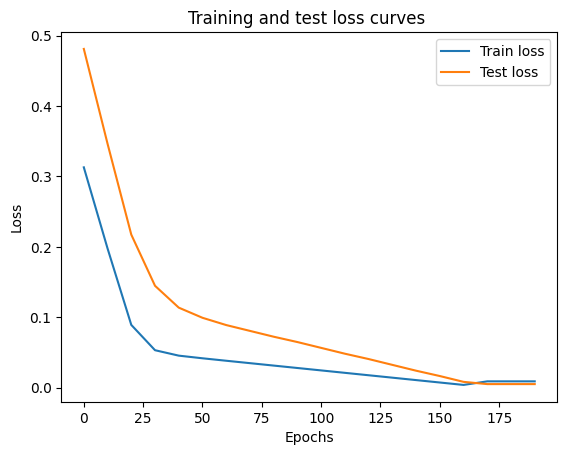

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves ")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
weight, bias

(0.7, 0.3)

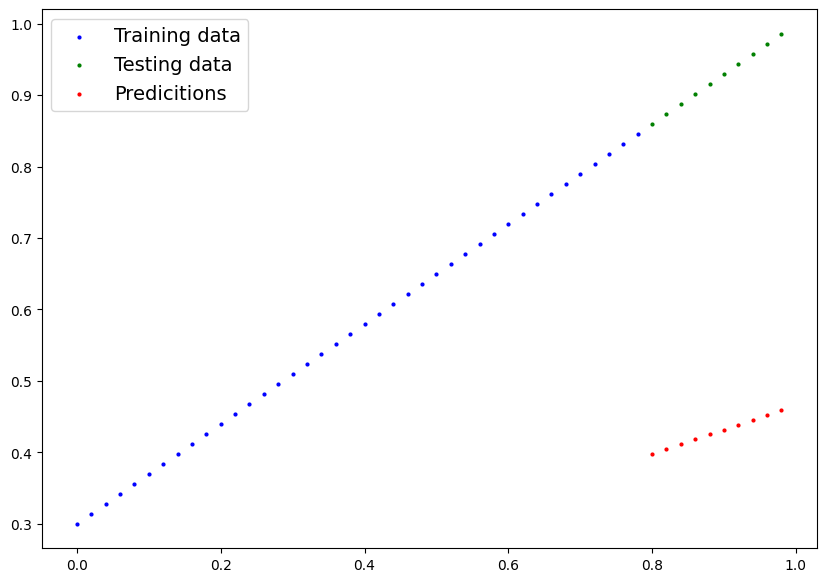

In [ ]:
plot_predictions(predictions=y_preds);

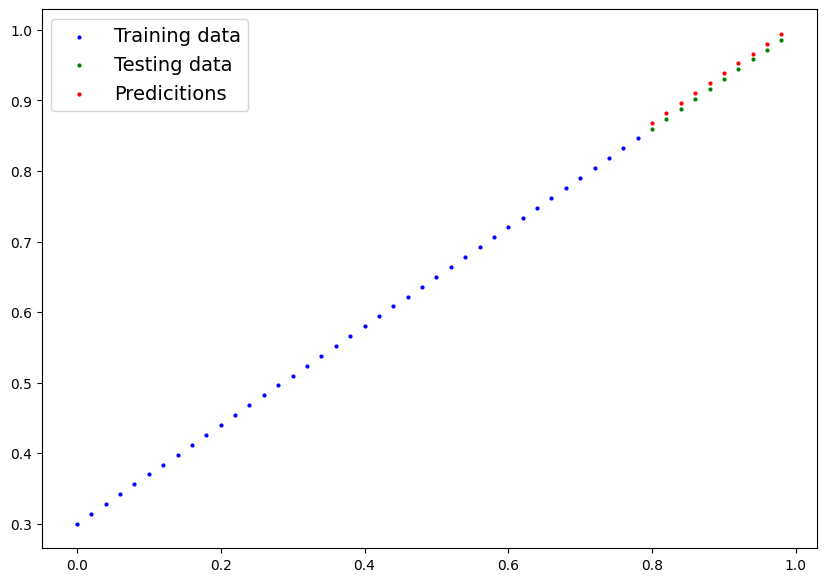

In [ ]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format.
2. `torch.load()` - allows you load a saved PyTorch object.
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary.

PyTorch save & load code tutorial + extra-curriculum - https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH= MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to : { MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to : models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Jul  6 17:04 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# load the saved state_dict of model_0 ( this will update the new instance with updated parameters )
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [ ]:
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

In [ ]:
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
## Compare loaded model preds with original models preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all togather

Let's go back through the steps above and see it all in one place.

In [ ]:
# Impact PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.3.0+cu121'

Create device-agnostic code.

This means if we've got access to a GPU, out code will use it ( for potentially faster computing ).

If no GPU is available, the code will default to using CPU.



In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### Data


In [ ]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create x and y ( features and labels )
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsequeeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot trainging data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data ")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14})


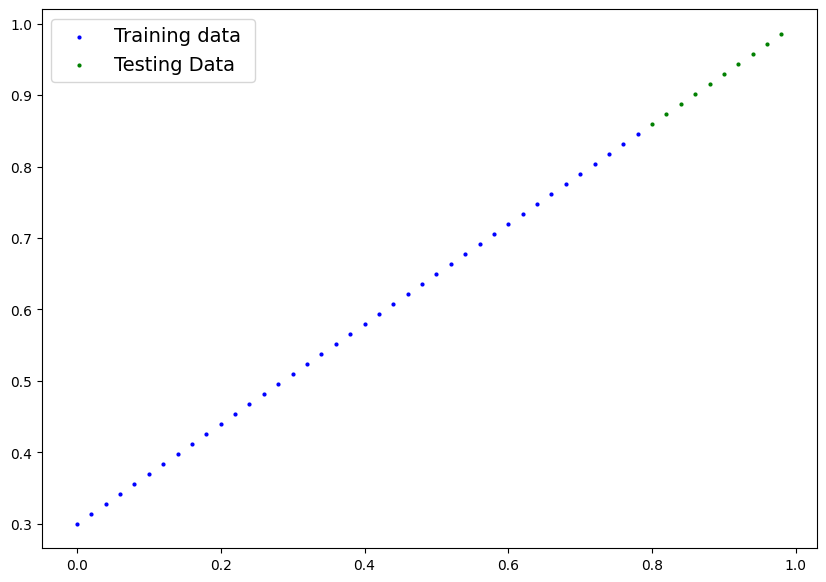

In [ ]:
# Plot the data
# Note : if you don't have the plot_predictions() function loaded, there will error
plot_predictions(X_train, y_train, X_test, y_test)

### Building a PyTorch Linear Model


In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called : linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.tensor) -> torch.Tensor:
    return self.linear_layer(x)


In [ ]:
# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

### Training

For training we need:

* Loss function
* Optimizer
* Training  loop
* Testing loop

In [ ]:
# Setup loss function
loss_fn = nn.L1Loss() # Same as MAE

In [ ]:
# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device ( Device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out the what's happening
  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Loss : {loss}  | Test loss : {test_loss}")


Epoch : 0 | Loss : 0.5551779866218567  | Test loss : 0.5739762187004089
Epoch : 10 | Loss : 0.439968079328537  | Test loss : 0.4392664134502411
Epoch : 20 | Loss : 0.3247582018375397  | Test loss : 0.30455657839775085
Epoch : 30 | Loss : 0.20954833924770355  | Test loss : 0.16984669864177704
Epoch : 40 | Loss : 0.09433845430612564  | Test loss : 0.03513690456748009
Epoch : 50 | Loss : 0.023886388167738914  | Test loss : 0.04784907028079033
Epoch : 60 | Loss : 0.019956795498728752  | Test loss : 0.045803118497133255
Epoch : 70 | Loss : 0.016517987474799156  | Test loss : 0.037530567497015
Epoch : 80 | Loss : 0.013089174404740334  | Test loss : 0.02994490973651409
Epoch : 90 | Loss : 0.009653178043663502  | Test loss : 0.02167237363755703
Epoch : 100 | Loss : 0.006215683650225401  | Test loss : 0.014086711220443249
Epoch : 110 | Loss : 0.00278724217787385  | Test loss : 0.005814164876937866
Epoch : 120 | Loss : 0.0012645035749301314  | Test loss : 0.013801801018416882
Epoch : 130 | Loss 

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
weight,bias

(0.7, 0.3)

### Making an Evaluating Predictions

In [ ]:
# Turn model into evaluating mode
model_1.eval()

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

In [ ]:
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

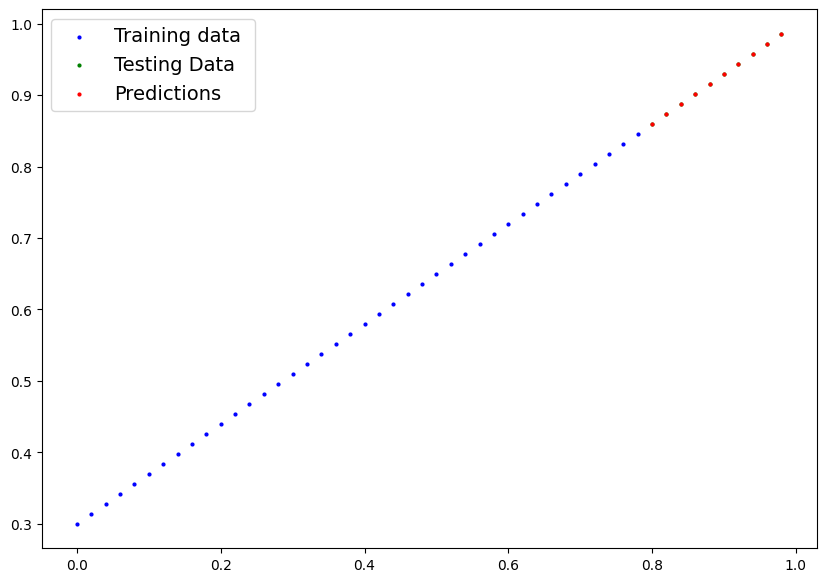

In [ ]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

### Saving and Loading a Trained Model

In [ ]:
from pathlib import PurePath

# 1. Create  models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
# Load a PyTorch model

# Create a new instance of Linear Regession model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

In [ ]:
loaded_model_1_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

In [ ]:
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')